In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/assignment 11 -16/Social_Network_Ads.csv")

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
X = df.iloc[:,[2,3]].values
X.shape

(400, 2)

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)
  


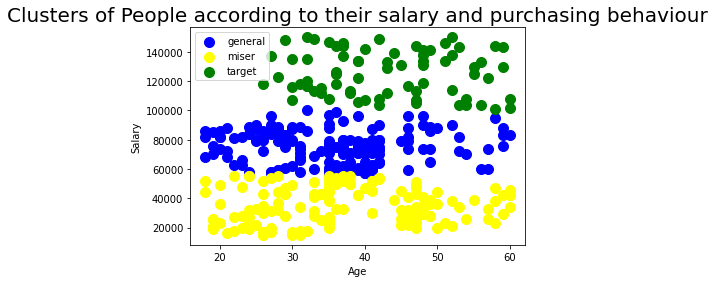

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300,  init = 'k-means++', random_state = 0, n_init = 10)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'target')

plt.title('Clusters of People according to their salary and purchasing behaviour',  fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
# splitting the dataset into dependent and independent sets

X = df.iloc[:, [2,3]].values
y = df["Purchased"].values


In [ ]:
# checking the shape of the datasets
print("Shape of X :", X.shape)
print('Shape of y :', y.shape)

Shape of X : (400, 2)
Shape of y : (400,)


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =0)

In [ ]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (300, 2)
X test shape:  (300, 2)
y train shape:  (300,)
y test shape:  (100,)


**Feature Scaling**

In [ ]:
#Using Standard scaler to unaffect the model by high difference independent variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred)

0.93

In [ ]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
results

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
Cm = confusion_matrix(y_test,y_pred) 

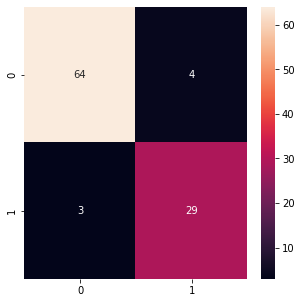

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.rcParams['figure.figsize'] = (5 , 5)
Cm = confusion_matrix(y_test, y_pred)
sns.heatmap(Cm, annot = True)